In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:10<00:00, 95.6MB/s]
100% 1.06G/1.06G [00:10<00:00, 109MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape =(256,256,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [7]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)


input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [8]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 1e-5),loss='binary_crossentropy',metrics = 'accuracy')


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 40)                1310760   
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip= True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256,256),
    batch_size= 32,
    class_mode='binary'
)


test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(256,256),
    batch_size= 32,
    class_mode='binary'
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
history = model.fit(train_generator,validation_data=test_generator,epochs =10,)

Epoch 1/10
625/625 [==============================] - 403s 617ms/step - loss: 0.3441 - accuracy: 0.8276 - val_loss: 0.1417 - val_accuracy: 0.9494
Epoch 2/10
625/625 [==============================] - 352s 562ms/step - loss: 0.1999 - accuracy: 0.9130 - val_loss: 0.1158 - val_accuracy: 0.9590
Epoch 3/10
625/625 [==============================] - 354s 566ms/step - loss: 0.1605 - accuracy: 0.9412 - val_loss: 0.0946 - val_accuracy: 0.9646
Epoch 4/10
625/625 [==============================] - 357s 572ms/step - loss: 0.1300 - accuracy: 0.9543 - val_loss: 0.0798 - val_accuracy: 0.9680
Epoch 5/10
625/625 [==============================] - 358s 573ms/step - loss: 0.1173 - accuracy: 0.9623 - val_loss: 0.0774 - val_accuracy: 0.9684
Epoch 6/10
625/625 [==============================] - 354s 567ms/step - loss: 0.1049 - accuracy: 0.9666 - val_loss: 0.0762 - val_accuracy: 0.9688
Epoch 7/10
625/625 [==============================] - 349s 558ms/step - loss: 0.0917 - accuracy: 0.9706 - val_loss: 0.0699 -

In [13]:
import matplotlib.pyplot as plt

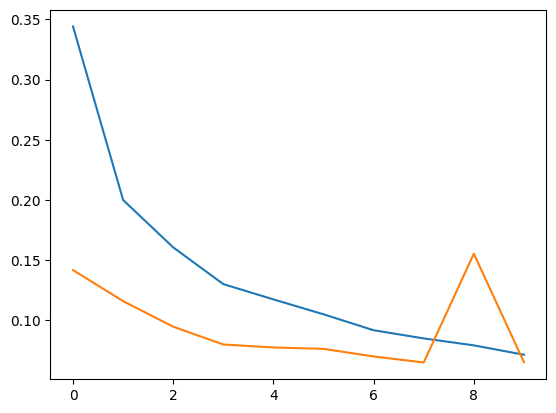

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

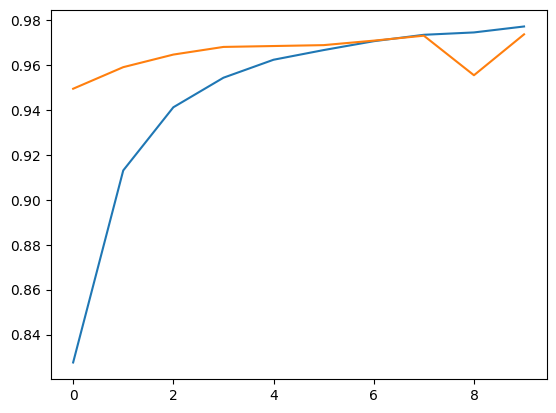

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])